# Thermal Imaging

Thermal imaging cameras are devices that translate thermal energy into visible light in order to analyze a particular object or scene. Thermal images can be used for immediate diagnosis or processed through specialized software for further evaluation, accuracy and report output. Thermal imaging cameras take measuring temperature to the next level; instead of getting a number for the temperature you get a picture showing the temperature differences of objects within the image/surface being examined.

## What Do Thermal Imaging Cameras See?

Visible light is what we see around us every day and is the only part of the electromagnetic spectrum that are visible to human eyes. Visible light only takes up a small area in the electromagnetic spectrum and **infrared radiation (IR)** represents a larger percentage. Viewing IR region of the spectrum requires specialized equipments.

All objects absorb, reflect and transmit energy at different levels. Different materials will give off heat or cold energy at different rates. It’s this energy that can be detected by infrared equipment and displayed as images. Such devices will only display a color thermal image of anything that is either above or below the selected temperature threshold. This energy from an object is also referred to as the **“heat signature”**, and the quantity of radiation emitted tends to be proportional to the overall heat of the object.

In general, thermal images are grayscale: with white representing heat, black representing colder regions, and various shades of grey indicating gradients of temperatures between the two. However, newer models of thermal imaging cameras actually add colour to the images they produce, in order to help users better identify distinct objects more clearly – using colours such as orange, blue, yellow, red and purple.

## Applications of Thermal Imaging

1. **Electrical maintenance** - Power line technicians use thermal imaging to locate and pinpoint joints and parts that are at risk of overheating as they’re already emitting more heat than the stronger sections. 
2. **Plumbing activity** use thermal imagers to inspect sites of possible leaks, mainly through walls and pipes. 
3. **Mechanical and building construction** technicians who work with thermal insulation use imaging to quickly identify leaks, which is important to maintain efficient temperature regulation in a building.
4. **Healthcare and medicine** also have practical uses, such as to spot fevers and temperature anomalies. This has proven to be especially important in airports where these thermal imaging cameras can quickly and accurately scan all incoming or outgoing passengers for higher temperatures, which was crucial during recent outbreaks of diseases like SARS and Ebola. Additionally, thermal imagers have been proven to help diagnose a range of disorders associated with the neck, back and limbs, as well as circulatory problems.
5. **Science and research** are undoubtedly sectors that draw significant benefits from using thermal imagers, for accurate and precise visualisations of heat patterns.

**Ref:** 

[1] https://www.grainger.com/know-how/equipment-information/kh-thermal-imaging-applications-uses-features-345-qt

[2] https://www.pyrosales.com.au/blog/thermal-imaging/thermal-imaging-where-is-it-used

### Data

The video feed and images used in this notebook is taken from http://csr.bu.edu/BU-TIV/BUTIV.html

### Import libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Define reusable functions

In [2]:
def read_image(image_path):
    
    '''
    reads the image and returns the RGB format.
    OpenCV defaults to the BGR format when reading the image. 
    Hence a conversion to RGB format is required.
    '''
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def imShowImage(image, cmap=None):
    
    '''
    plots the image
    '''
    plt.figure(figsize=(20,10))
    plt.imshow(image, cmap)

### Read & Display the Image

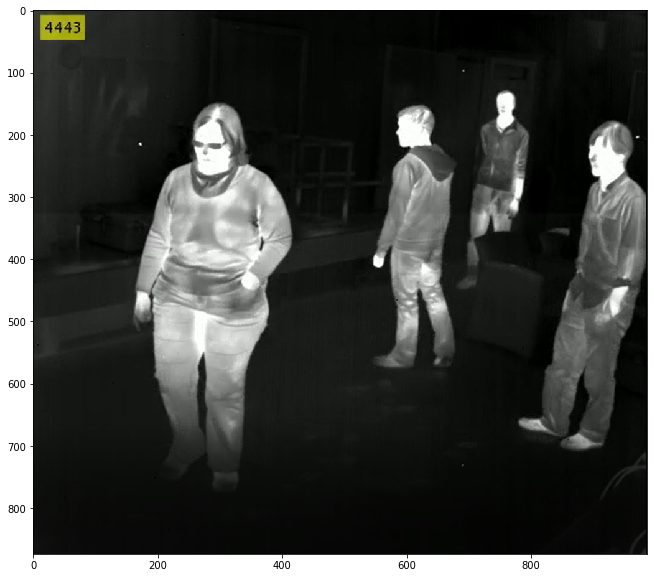

In [3]:
image = read_image('Data/ThermalScreening1.PNG')
imShowImage(image)

### Apply the HOT Colormap

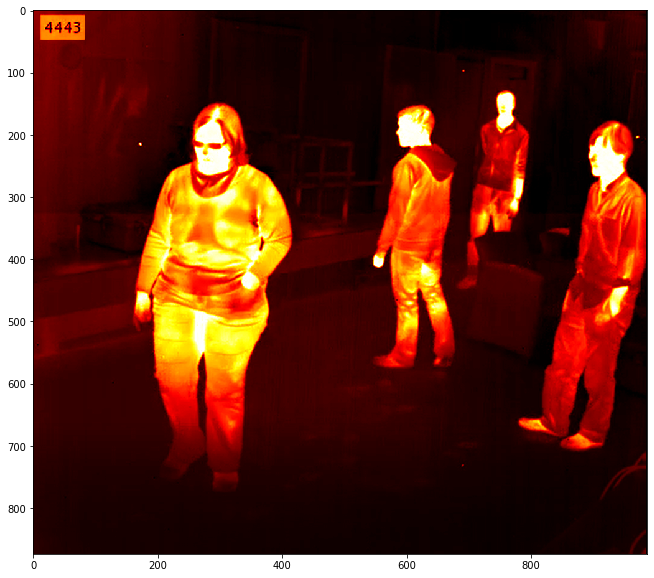

In [4]:
heatmap_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
heatmap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_HOT)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
imShowImage(heatmap)

### Convert the Image Heatmap to Binary Format

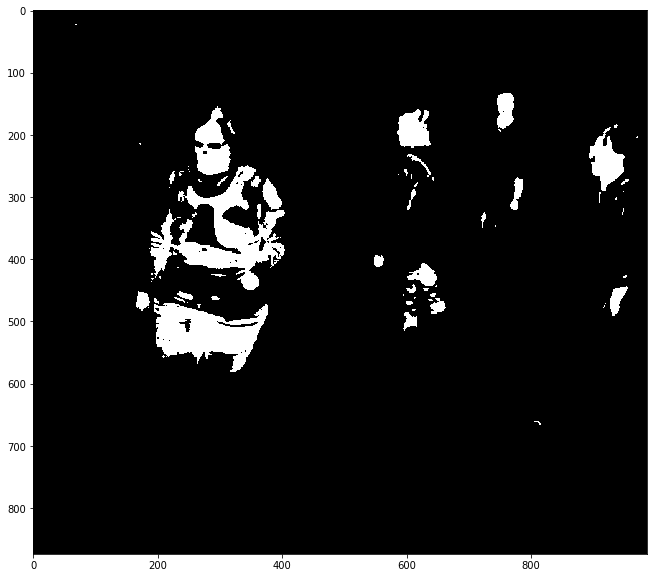

In [5]:
heatmap_gray = cv2.cvtColor(heatmap, cv2.COLOR_RGB2GRAY)
ret, binary_thresh = cv2.threshold(heatmap_gray, 200, 255, cv2.THRESH_BINARY)
imShowImage(binary_thresh, cmap='gray')

### Noise Removal - Morphological Erosion followed by Dilation

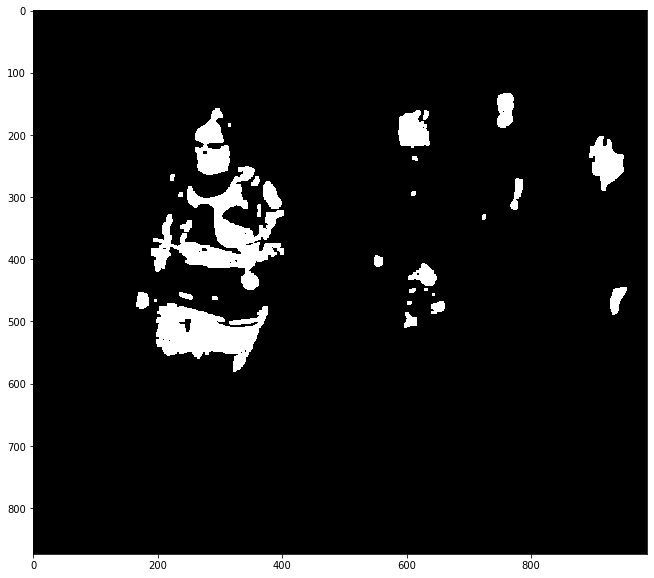

In [6]:
kernel = np.ones((5, 5), np.uint8)
eroded = cv2.erode(binary_thresh, kernel, iterations=1)
dilated = cv2.dilate(eroded, kernel, iterations=1)
imShowImage(dilated, cmap='gray')

### Find the Contours

In [7]:
# Get contours from the image obtained by opening operation
contours, _ = cv2.findContours(dilated, 1, 2)
image_with_rectangles = np.copy(heatmap)

for contour in contours:
    # rectangle over each contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Draw rectangles for visualisation
    contouredImage = cv2.rectangle(image_with_rectangles, (x, y), (x+w, y+h), (0, 255, 0), 2)

### Display the Images

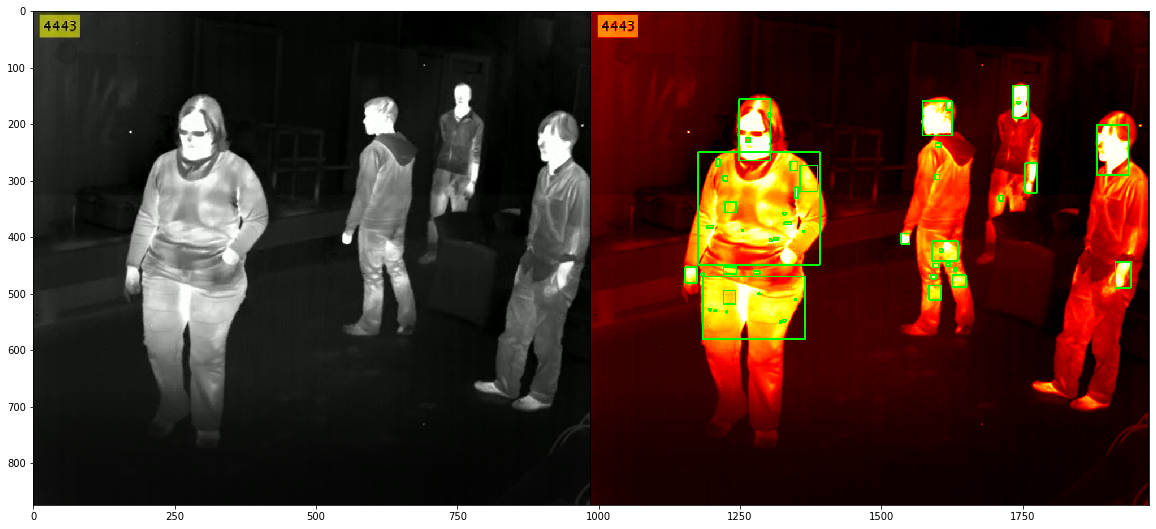

In [8]:
stacked = np.hstack((image, contouredImage))
imShowImage(stacked, cmap='gray')

### Single Reusable Function

In [9]:
def GetThermalImage(image):
    
    """
    Reads the image and returns the thermal version of
    the image by extracting all the regions of the image 
    that have a temperature difference.
    
    """
    image = read_image(image)
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    heatmap = cv2.applyColorMap(gray, cv2.COLORMAP_HOT)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    
    heatmap_gray = cv2.cvtColor(heatmap, cv2.COLOR_RGB2GRAY)
    ret, binary_thresh = cv2.threshold(heatmap_gray, 200, 255, cv2.THRESH_BINARY)
    
    kernel = np.ones((5, 5), np.uint8)
    eroded = cv2.erode(binary_thresh, kernel, iterations=1)
    dilated = cv2.dilate(eroded, kernel, iterations=1)
    
    # Get contours from the image obtained by opening operation
    contours, _ = cv2.findContours(dilated, 1, 2)
    image_with_rectangles = np.copy(heatmap)

    for contour in contours:
        # rectangle over each contour
        x, y, w, h = cv2.boundingRect(contour)

        # Draw rectangles for visualisation
        contouredImage = cv2.rectangle(image_with_rectangles, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    stacked = np.hstack((image, contouredImage))
    imShowImage(stacked, cmap='gray')

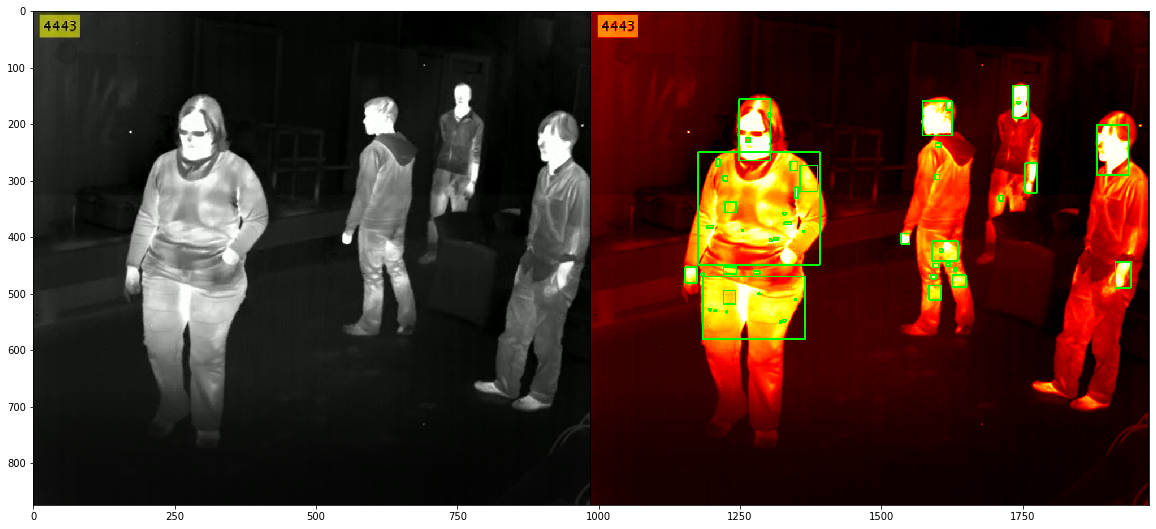

In [10]:
GetThermalImage(image='Data/ThermalScreening1.PNG')

**Thermal conversion for Videos** @ https://github.com/sauravmishra1710/OpenCV-Playground/blob/master/ThermalScreening%20-%20Video.ipynb